## Análise exploratória dos dados

No primeiro momento, foi realizado uma análise exploratória dos dadaset afim de verificar possíveis inconsistências nos dados.

In [144]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [145]:
# Dados
# customer original
df_customer = pd.read_csv("dados/customer_original.csv")

# customer nps
df_nps = pd.read_csv("dados/customer_nps.csv")

# sutomer social
df_social = pd.read_csv("dados/customer_social.csv")



In [146]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 


In [147]:
print(f"Duplicatas completas: {df_customer.duplicated().sum()}")

Duplicatas completas: 168


In [148]:
df_customer.duplicated().value_counts()

False    7066
True      168
Name: count, dtype: int64

In [149]:
# Limpando os CPFs 
df_customer['cpf'] = df_customer['cpf'].str.replace(r'\D', '', regex=True)


In [150]:
# Checando duplicatas
df_customer[df_customer.duplicated(subset='cpf', keep=False)]


,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,10433218100
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,96001338914
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,08386379499
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,02654235114
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,16155940789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,35,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.10,Yes,71912038110
7197,30,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Electronic check,86.45,2538.05,No,87692082804
7198,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No,32308981334
7207,46,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),91.30,4126.35,No,33720948404


Foram identificados valores duplicados de CPF que foram posteriormente removidos

In [90]:
#cpfs_repetidos = df_customer['cpf'][df_customer['cpf'].duplicated()].unique()#
#print(cpfs_repetidos)

In [151]:
df_customer=df_customer.drop_duplicates(subset='cpf', keep='first')
#df_customer[df_customer.duplicated(subset='cpf', keep=False)]

df_customer.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [152]:
# Verificando NAs
df_customer[df_customer.isna().any(axis=1)]
# Resultados sem NAs

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf


In [153]:
df_nps.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [154]:
df_social.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [155]:
df_nps=df_nps.drop_duplicates(subset='cpf', keep='first')
df_nps.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [156]:
df_social=df_social.drop_duplicates(subset='cpf', keep='first')
df_social.duplicated().value_counts()


False    7065
Name: count, dtype: int64

In [97]:
#assert df_customer['cpf'].equals(df_nps['cpf']) and df_customer['cpf'].equals(df_social['cpf']), "CPFs não estão na mesma ordem!"

In [157]:
for df in [df_customer, df_nps, df_social]:
    df['cpf'] = (
        df['cpf']
        .astype(str)              
        .str.replace(r'\.|\-| ', '', regex=True)  
        .str.zfill(11)            
    )

In [99]:
#df_nps.info()
#df_customer.info()
#df_social.info()

Os três bancos de dados foram unidos, usando o CPf com chave primária

In [158]:
# Juntando os bancos de dados
df_temp = pd.merge(df_customer, df_nps, on='cpf', how='inner')
df_final = pd.merge(df_temp, df_social, on='cpf', how='inner')
#df_final.head(25)

In [159]:
df_final.duplicated().value_counts()
#df_final.to_csv("datasets_unidos.csv", index=False, encoding="utf-8")

False    7065
Name: count, dtype: int64

In [160]:
# Contagem dos CPFs para verificar se os valores são únicos
df_final['cpf'].value_counts()

cpf
20410372883    1
10433218100    1
96001338914    1
08386379499    1
02654235114    1
              ..
26916697857    1
53287101269    1
23884969692    1
39537672409    1
35030564160    1
Name: count, Length: 7065, dtype: int64

In [161]:
df_final[df_final["tenure"] == 0][["TotalCharges", "tenure"]]

,TotalCharges,tenure


Foram identificados valores altos (outliers) nas variávei **TotalCharges** e **MonthlyCharges**, que foram removidos. Vale ressaltar que estes valores foram removidos apenas por critério de magnitude, seria necessário avaliar melhor o contexto dos contratos dos CFPs envolvidos.

<Axes: xlabel='TotalCharges'>

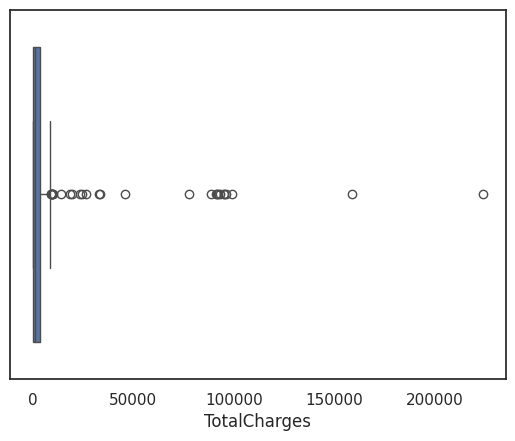

In [104]:
sns.boxplot(data=df_final, x='TotalCharges')

<Axes: xlabel='MonthlyCharges'>

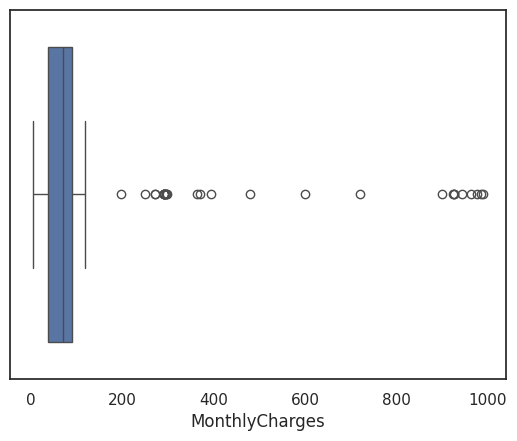

In [105]:
sns.boxplot(data = df_final, x = 'MonthlyCharges')

In [162]:
# remoção dos outliers

colunas_numericas = ['TotalCharges', 'MonthlyCharges']

df_limpo = df_final.copy()

for coluna in colunas_numericas:
    Q3 = df_limpo[coluna].quantile(0.75)
    limite_superior = Q3 + 1.5 * (Q3 - df_limpo[coluna].quantile(0.25))
    df_limpo = df_limpo[df_limpo[coluna] <= limite_superior]

df_limpo[colunas_numericas].describe()

df_limpo.describe()

,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen
count,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000
mean,32.414558,64.807229,2282.828874,7.154677,0.162354
std,24.545564,30.086461,2266.625162,2.649100,0.368802
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.612500,401.350000,5.000000,0.000000
50%,29.000000,70.350000,1397.100000,8.000000,0.000000
75%,55.000000,89.900000,3793.775000,9.000000,0.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000


In [163]:
df_limpo[df_limpo["tenure"] == 0][["TotalCharges", "tenure"]]

,TotalCharges,tenure


In [164]:
df_limpo['churn_bin'] = df_limpo['Churn'].map({'Yes':1, 'No':0})

servicos = [
    'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_limpo['TotalServicosContratados'] = df_limpo[servicos].apply(
    lambda x: sum(x == 'Yes'), axis = 1
)

# Na tabelas df_limpo.discribe(), há total de serviços contratados com valores 0, o que indica possível  inconsistência nos dados, então
#decidir remover todos os CPFs com zero serviços contratados, ao todo foram 80 observações.
#df_limpo = df_limpo[df_limpo['TotalServicosContratados'] > 0]
#print(df_limpo[['cpf', 'TotalServicosContratados']].head())

df_limpo['TotalServicosContratados'].isna().value_counts()



TotalServicosContratados
False    7034
Name: count, dtype: int64

In [ ]:
#df_limpo.to_csv("dados/df_limpo_modelagem.csv", index=False)


In [109]:
df_limpo.describe()

,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen,churn_bin,TotalServicosContratados
count,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000
mean,32.414558,64.807229,2282.828874,7.154677,0.162354,0.265852,3.363662
std,24.545564,30.086461,2266.625162,2.649100,0.368802,0.441817,2.061880
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.612500,401.350000,5.000000,0.000000,0.000000,1.000000
50%,29.000000,70.350000,1397.100000,8.000000,0.000000,0.000000,3.000000
75%,55.000000,89.900000,3793.775000,9.000000,0.000000,1.000000,5.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000,1.000000,8.000000


In [110]:
df = df.dropna().reset_index(drop=True)

## Análise Descritiva

Nesta sessão será feita a análise descritiva para as variáveis **Churn** e **NPS**

### Análise descritiva para variável Churn

Com a atual base de dados, em que foram feitas suas devidas limpezas e ajustes. Foi identificado um **Churn** de aproximadamente 26%

In [111]:
# Quantidade de Churn
df_limpo[["Churn"]].value_counts(normalize=True)*100

Churn
No       73.414842
Yes      26.585158
Name: proportion, dtype: float64

Em um primeiro momento, buscou-se avaliar o Churn pela quantidade de serviços contratados, com o objetivo de averiguar se a quantidade de serviços contratados iria influenciar no **Churn**.

In [112]:
tabela_churn = pd.crosstab(
    df_limpo['TotalServicosContratados'],
    df_limpo['churn_bin'],
    margins=True,
    margins_name="Total"
)

tabela_churn['% Churn'] = (tabela_churn[1] / tabela_churn['Total'] * 100).round(1)
#tabela_churn['% Fidelidade'] = (tabela_churn[0] / tabela_churn['Total'] * 100).round(1)

tabela_churn = tabela_churn.rename(columns={
    0: 'Não Churn',
    1: 'Churn'
})

print("Relação entre Quantidade de Serviços e Churn:")
print(tabela_churn.to_string())

Relação entre Quantidade de Serviços e Churn:
churn_bin                 Não Churn  Churn  Total  % Churn
TotalServicosContratados                                  
0                                45     35     80     43.8
1                              1338    359   1697     21.2
2                               796    390   1186     32.9
3                               613    352    965     36.5
4                               633    289    922     31.3
5                               674    233    907     25.7
6                               522    152    674     22.6
7                               346     49    395     12.4
8                               197     11    208      5.3
Total                          5164   1870   7034     26.6


Nota-se que com aumento de serviços contratados, o **Churn** diminui, logo podemos pensar em uma estratégia de vendas de pacotes de serviços.

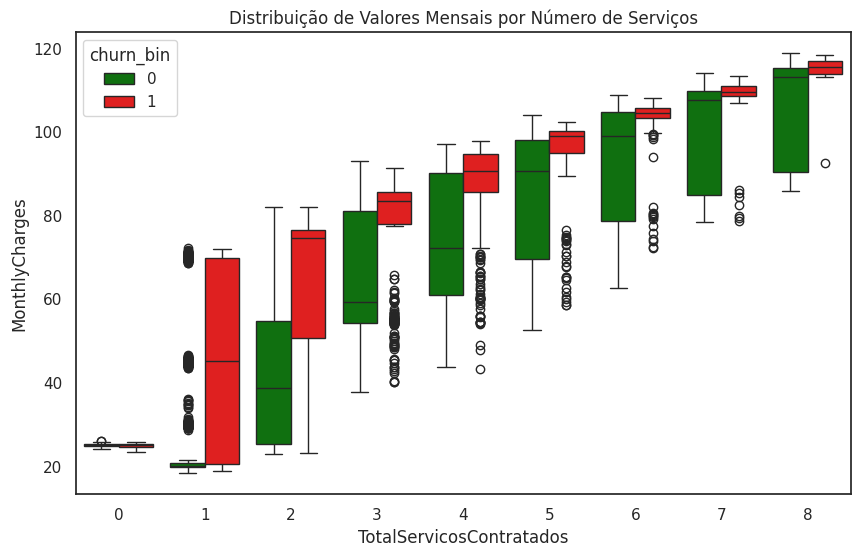

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_limpo,
    x='TotalServicosContratados',
    y='MonthlyCharges',
    hue='churn_bin',
    palette={0: 'green', 1: 'red'}
)
plt.title('Distribuição de Valores Mensais por Número de Serviços')
plt.show()

In [114]:
var_num  = df_limpo.select_dtypes(include=['int64']).columns.tolist()
var_num = [col for col in var_num if col not in ['churn_bin', 'TotalServicosContratados']] 

In [115]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

for col in var_num:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_limpo, col)
    display(churn_df)
    
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para tenure:**


,tenure,Churn
0,1,61.99
1,2,51.68
2,3,47.00
3,4,47.46
4,5,48.12
...,...,...
67,68,9.00
68,69,8.42
69,70,9.24
70,71,3.53


-> Maior Churn: '1.0' com 61.99%

**Churn Rate para NPS:**


,NPS,Churn
0,0,88.89
1,1,86.92
2,2,74.93
3,3,66.46
4,4,55.02
5,5,44.61
6,6,34.24
7,7,28.64
8,8,19.08
9,9,7.72


-> Maior Churn: '0.0' com 88.89%

**Churn Rate para SeniorCitizen:**


,SeniorCitizen,Churn
0,0,23.66
1,1,41.68


-> Maior Churn: '1.0' com 41.68%


Podemos notar que o Churn diminui de acordo com aumento de permanencia do individuo com o contrato de serviços (medido na variável **tenure**). Para fins práticos a variável será categorizada para entender melhor os períodos mais propensos ao cancelamento. 

In [116]:
bins = [1, 6, 12, 24, 48, 60, float('inf')]  
labels = [
    '1-6m',   
    '7-12m', 
    '13-24m', 
    '25-48m', 
    '49-60m', 
    '60m+'
]

df_limpo['tenure_cat'] = pd.cut(
    df_limpo['tenure'],
    bins=bins,
    labels=labels,
    right=False
)

print("\nDistribuição por categoria:")
print(df_limpo['tenure_cat'].value_counts().sort_index())


Distribuição por categoria:
tenure_cat
1-6m      1361
7-12m      699
13-24m    1047
25-48m    1624
49-60m     820
60m+      1483
Name: count, dtype: int64


In [117]:
#  tabela resumo
tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']
                  .agg(['count', 'mean'])
                  .rename(columns={
                      'count': 'Total Clientes',
                      'mean': 'Taxa Churn'
                  }))

tabela_simples['Taxa Churn'] = (tabela_simples['Taxa Churn'] * 100).round(1).astype(str) + '%'

print("Taxa de Churn por Tempo de Permanência:")
print(tabela_simples)

Taxa de Churn por Tempo de Permanência:
            Total Clientes Taxa Churn
tenure_cat                           
1-6m                  1361      54.7%
7-12m                  699      36.5%
13-24m                1047      29.5%
25-48m                1624      20.9%
49-60m                 820      15.0%
60m+                  1483       6.7%


/tmp/ipykernel_6384/2232545065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']


In [118]:
# plt.figure(figsize=(10, 7))

# ax = sns.barplot(
#     data=df_limpo,
#     x='tenure_cat',
#     y='churn_bin',
#     estimator=lambda x: sum(x) / len(x) * 100,
#     ci=None,
#     palette='viridis',  
#     order=['1-6m', '7-12m', '13-24m', '25-48m', '49-60m', '60m+']
# )

# plt.title('Taxa de Churn por Tempo de Permanência', fontsize=16, pad=20)
# plt.xlabel('Tempo como Cliente (meses)', fontsize=12)
# plt.ylabel('Taxa de Churn (%)', fontsize=12)

# ax.grid(False) 

# for spine in ax.spines.values():
#     spine.set_visible(True)

# for p in ax.patches:
#     ax.annotate(
#         f'{p.get_height():.1f}%', 
#         (p.get_x() + p.get_width() / 2., p.get_height()),
#         ha='center', 
#         va='center',
#         xytext=(0, 10),
#         textcoords='offset points',
#         fontsize=11
#     )

# plt.xticks(rotation=45, ha='right')

# plt.tight_layout()
# plt.show()

Com é possível observar no gráfico abaixo, nota-se que a maior porcentagem de Churn, se concetra nos primeiros seis meses de contrato até  um ano do contrato. Decaíndo até 7%, aproximadamente, para mais de cinco anos de contrato.

Foi avaliado as variáveis contínuas **Total Charges** e **Monthly Charges**. Podemos notar que para o **Churn (Yes)**, se concetra no Monthly Charges no valores de apartir de 70 R$ até 100 R$ de mensalidade.

/tmp/ipykernel_6384/398727190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_limpo.groupby('tenure_cat')['churn_bin'].mean() * 100
/tmp/ipykernel_6384/398727190.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_6384/398727190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_6384/398727190.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


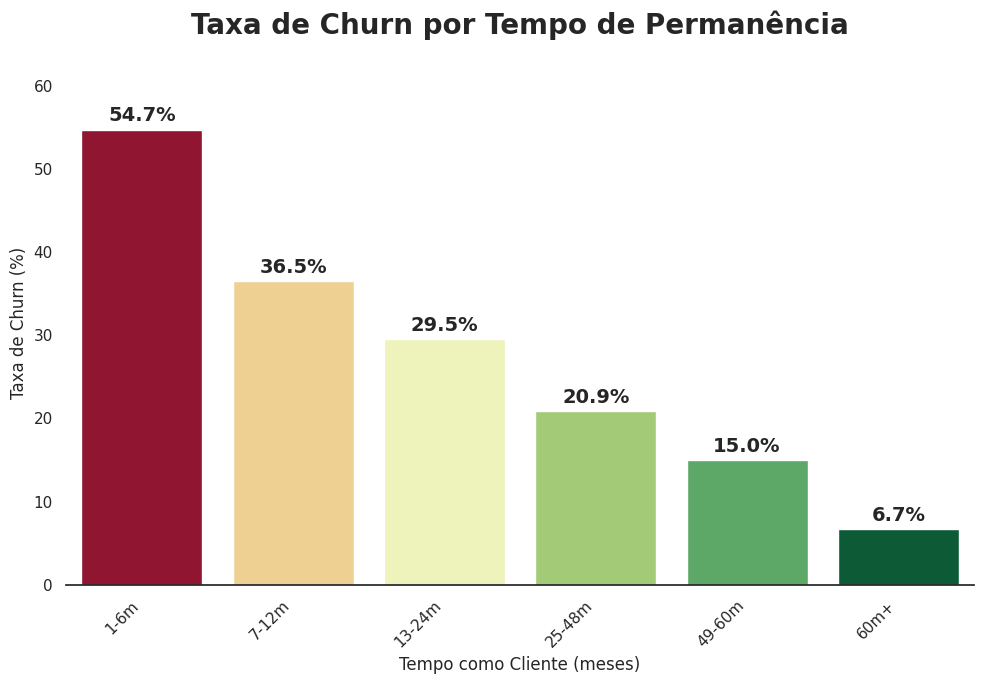

In [119]:
plt.figure(figsize=(10, 7))

churn_rates = df_limpo.groupby('tenure_cat')['churn_bin'].mean() * 100
norm = plt.Normalize(vmin=churn_rates.min(), vmax=churn_rates.max())
colors = plt.cm.RdYlGn_r(norm(churn_rates))

ax = sns.barplot(
    data=df_limpo,
    x='tenure_cat',
    y='churn_bin',
    estimator=lambda x: sum(x) / len(x) * 100,
    ci=None,
    palette=colors,
    order=['1-6m', '7-12m', '13-24m', '25-48m', '49-60m', '60m+']
)

plt.title('Taxa de Churn por Tempo de Permanência', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Tempo como Cliente (meses)', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)
plt.ylim(0, churn_rates.max() * 1.15)

ax.grid(False)
sns.despine(left=True)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=14,
        fontweight='bold'
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


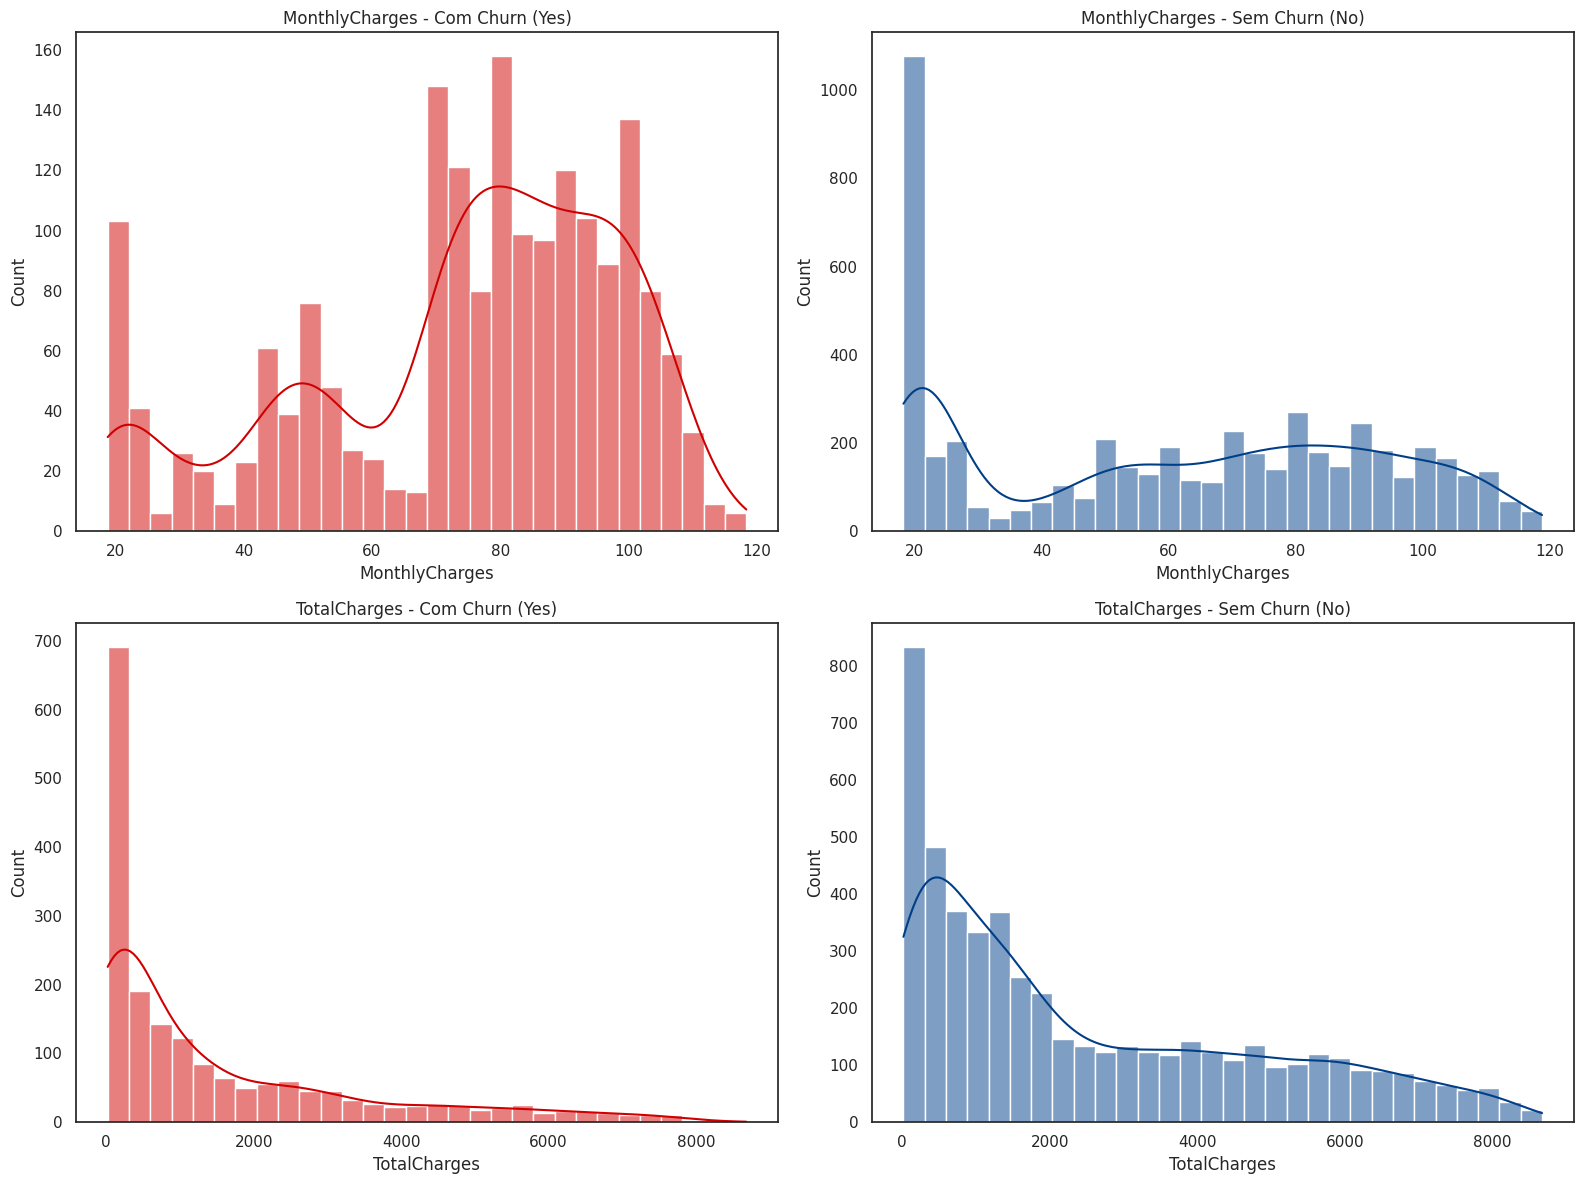

In [120]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(
    data=df_limpo[df_limpo['Churn'] == 'Yes'],
    x='MonthlyCharges',
    color='#d00000',
    bins=30, kde=True
)
plt.title('MonthlyCharges - Com Churn (Yes)')

plt.subplot(2, 2, 2)
sns.histplot(
    data=df_limpo[df_limpo['Churn'] == 'No'],
    x='MonthlyCharges',
    color='#003f88',
    bins=30, kde=True
)
plt.title('MonthlyCharges - Sem Churn (No)')

plt.subplot(2, 2, 3)
sns.histplot(
    data=df_limpo[df_limpo['Churn'] == 'Yes'],
    x='TotalCharges',
    color='#d00000',
    bins=30, kde=True
)
plt.title('TotalCharges - Com Churn (Yes)')

plt.subplot(2, 2, 4)
sns.histplot(
    data=df_limpo[df_limpo['Churn'] == 'No'],
    x='TotalCharges',
    color='#003f88',
    bins=30, kde=True
)
plt.title('TotalCharges - Sem Churn (No)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_6384/2284436847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges',
/tmp/ipykernel_6384/2284436847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges',


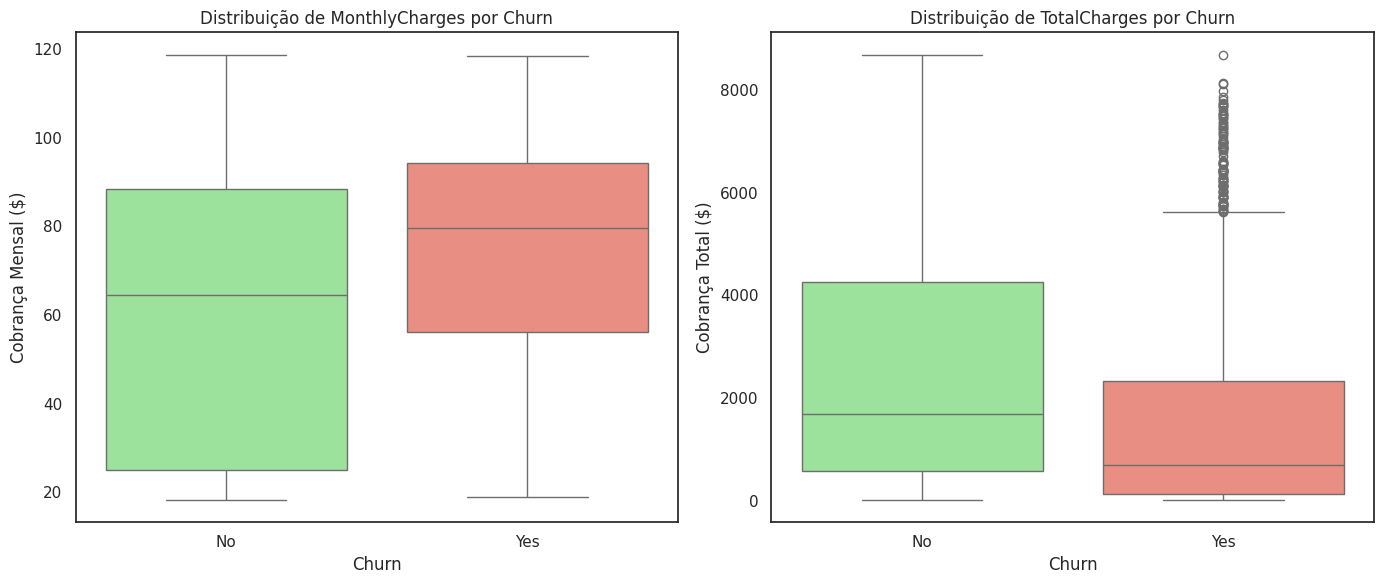

In [121]:
plt.figure(figsize=(14, 6))

# MonthlyCharges
plt.subplot(1, 2, 1)
sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de MonthlyCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal ($)')

# TotalCharges
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de TotalCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Total ($)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_6384/1822097320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='tenure',


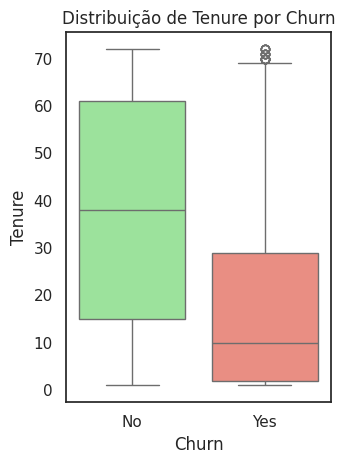

In [122]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='tenure', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.tight_layout()
plt.show()

Análise para as variáveis categóricas

In [123]:
cat_cols = df_limpo.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Churn', 'cpf']] 

In [124]:
#def calculate_churn_rate(df, column):
#    return (df.groupby(column)['churn_bin']
#            .mean()
#            .mul(100)
#            .round(2)
#            .reset_index()
#            .rename(columns={'churn_bin': 'Churn'}))

#for col in cat_cols:
#    print(f"\n**Churn Rate para {col}:**")
#    churn_df = calculate_churn_rate(df_limpo, col)
#    display(churn_df)
    
#    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
#    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")

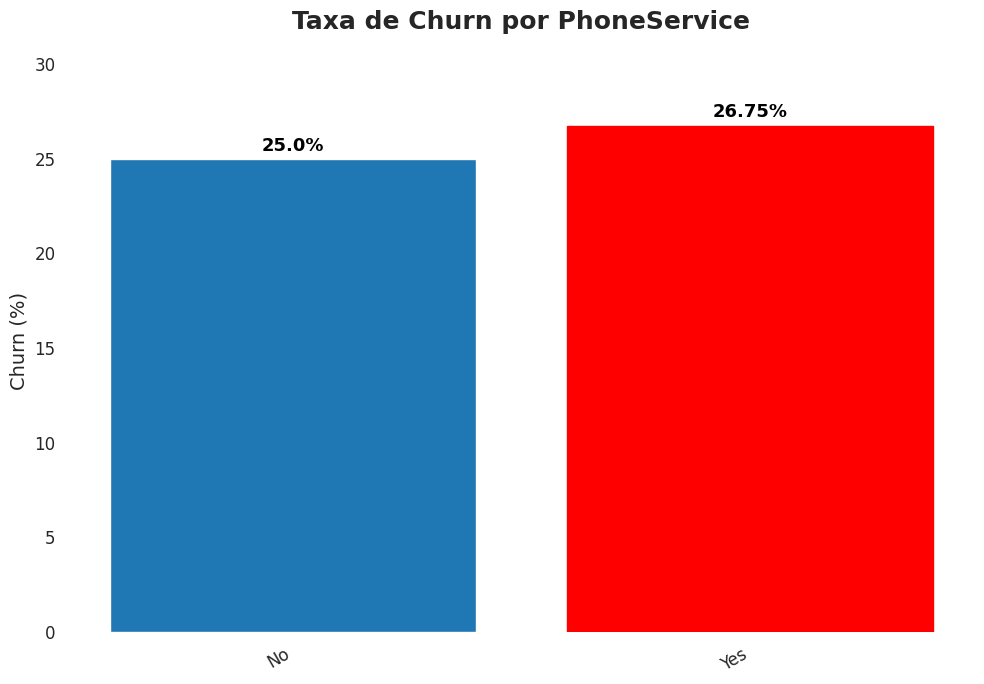


**Churn Rate para PhoneService:**


,PhoneService,Churn
0,No,25.00
1,Yes,26.75


-> Maior Churn: 'Yes' com 26.75%


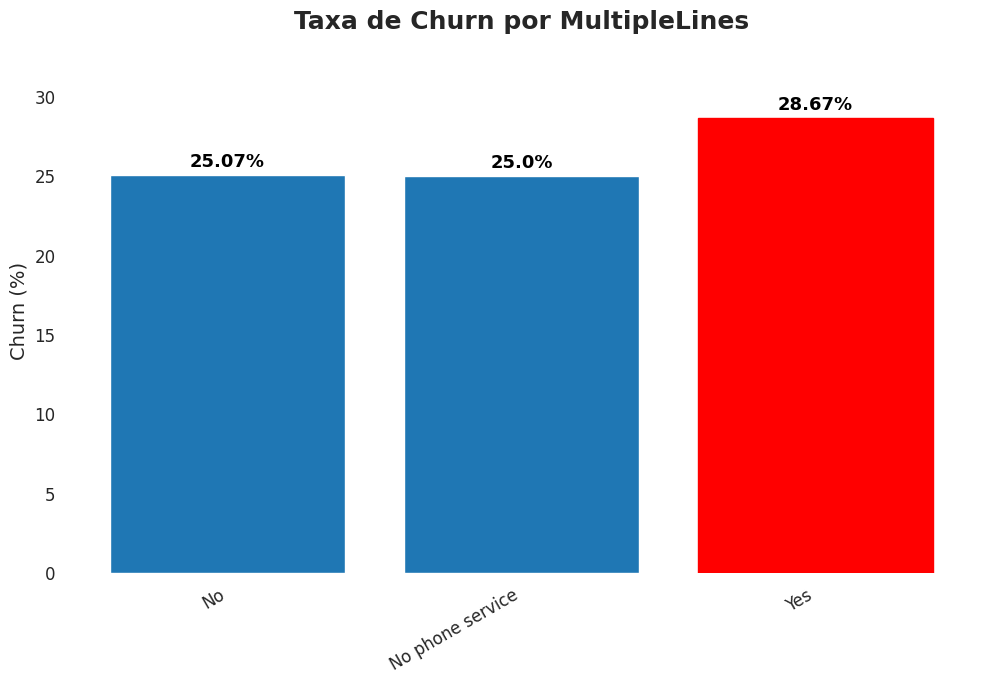


**Churn Rate para MultipleLines:**


,MultipleLines,Churn
0,No,25.07
1,No phone service,25.00
2,Yes,28.67


-> Maior Churn: 'Yes' com 28.67%


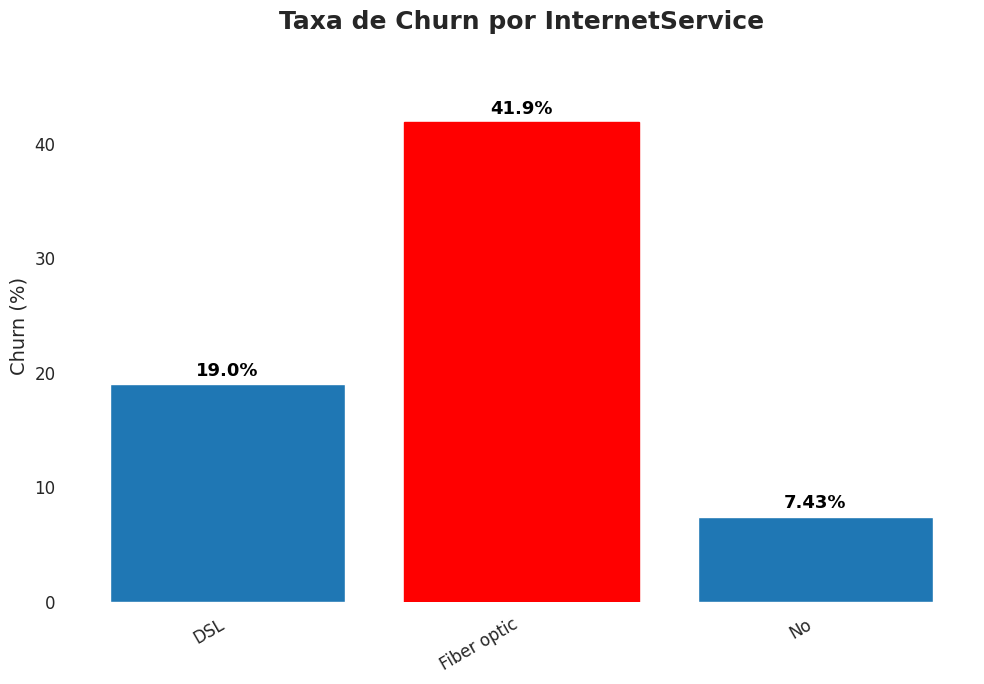


**Churn Rate para InternetService:**


,InternetService,Churn
0,DSL,19.00
1,Fiber optic,41.90
2,No,7.43


-> Maior Churn: 'Fiber optic' com 41.9%


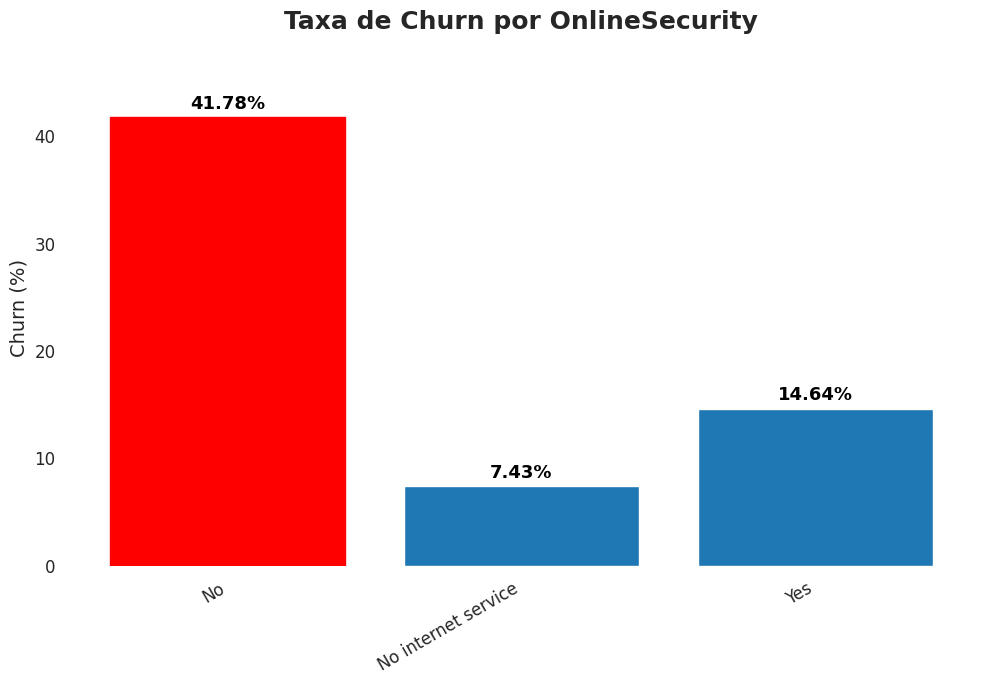


**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.78
1,No internet service,7.43
2,Yes,14.64


-> Maior Churn: 'No' com 41.78%


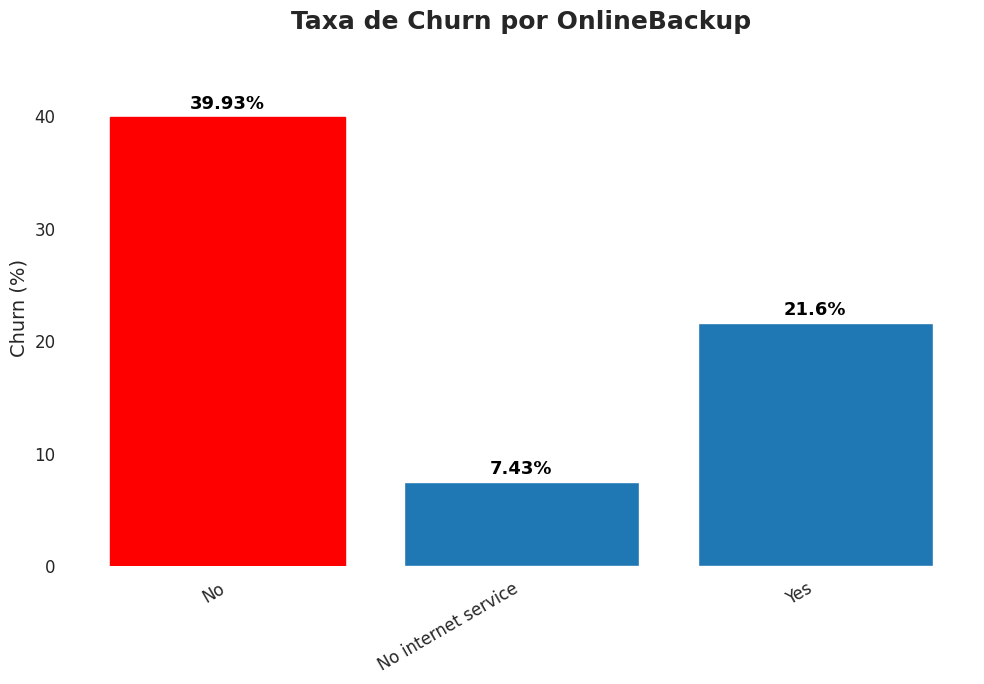


**Churn Rate para OnlineBackup:**


,OnlineBackup,Churn
0,No,39.93
1,No internet service,7.43
2,Yes,21.60


-> Maior Churn: 'No' com 39.93%


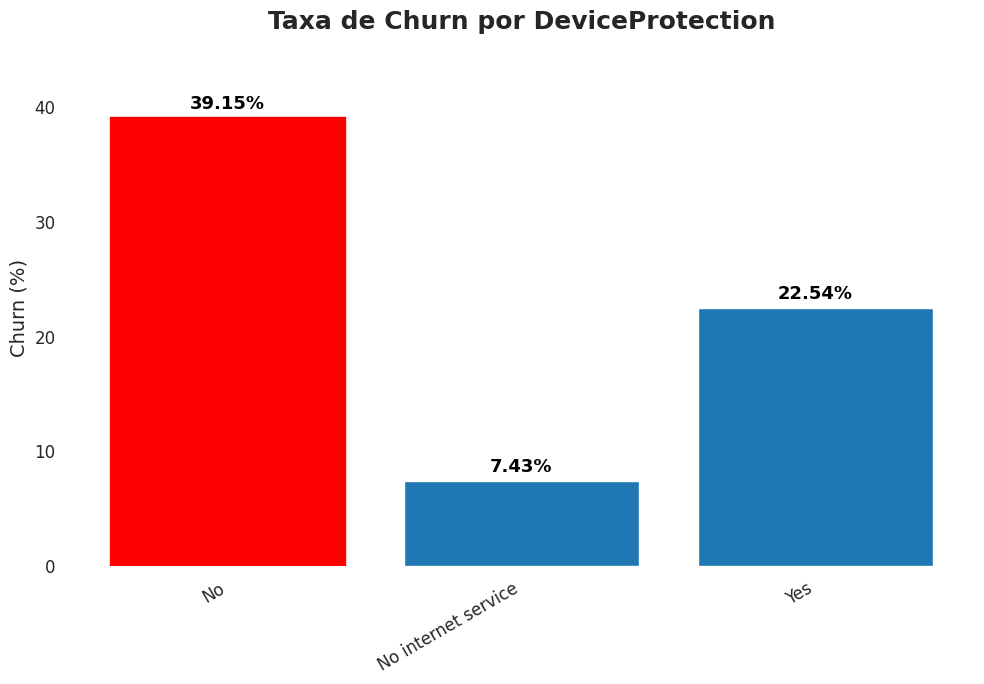


**Churn Rate para DeviceProtection:**


,DeviceProtection,Churn
0,No,39.15
1,No internet service,7.43
2,Yes,22.54


-> Maior Churn: 'No' com 39.15%


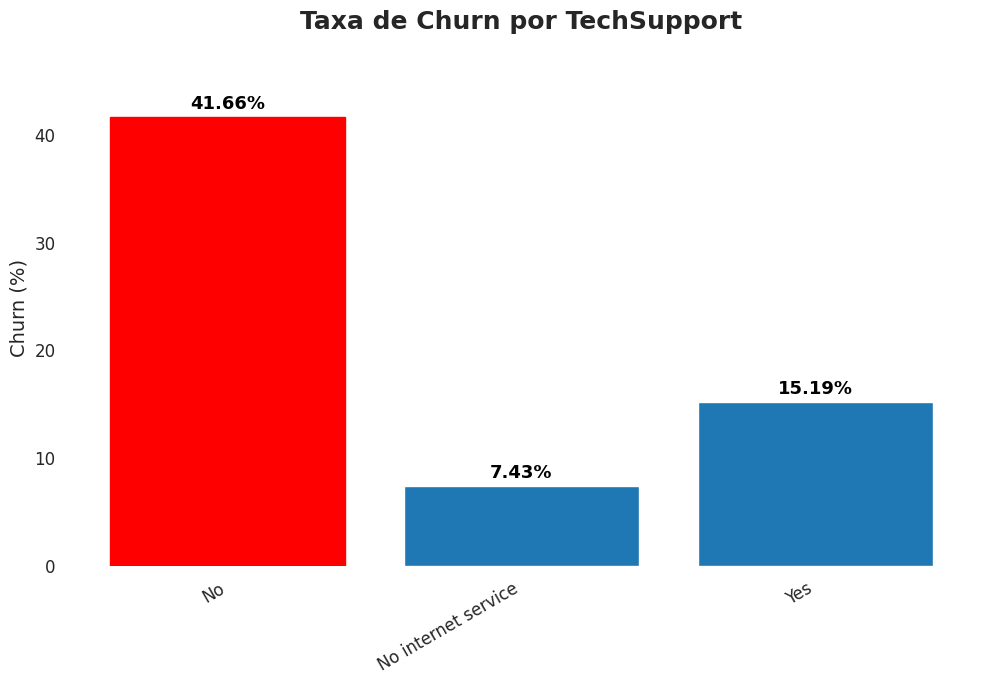


**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.66
1,No internet service,7.43
2,Yes,15.19


-> Maior Churn: 'No' com 41.66%


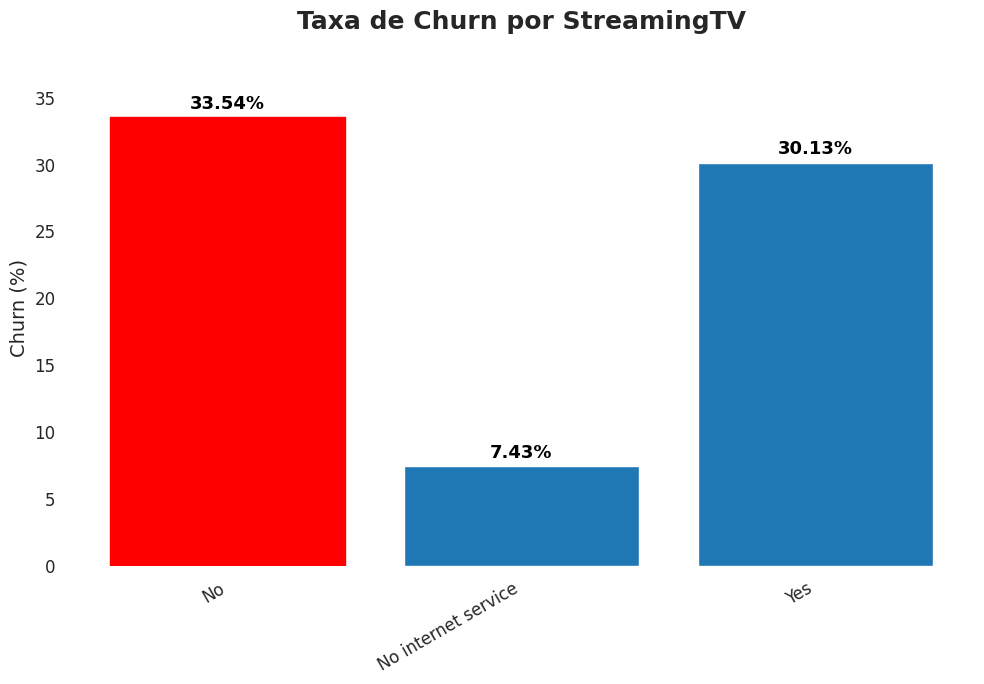


**Churn Rate para StreamingTV:**


,StreamingTV,Churn
0,No,33.54
1,No internet service,7.43
2,Yes,30.13


-> Maior Churn: 'No' com 33.54%


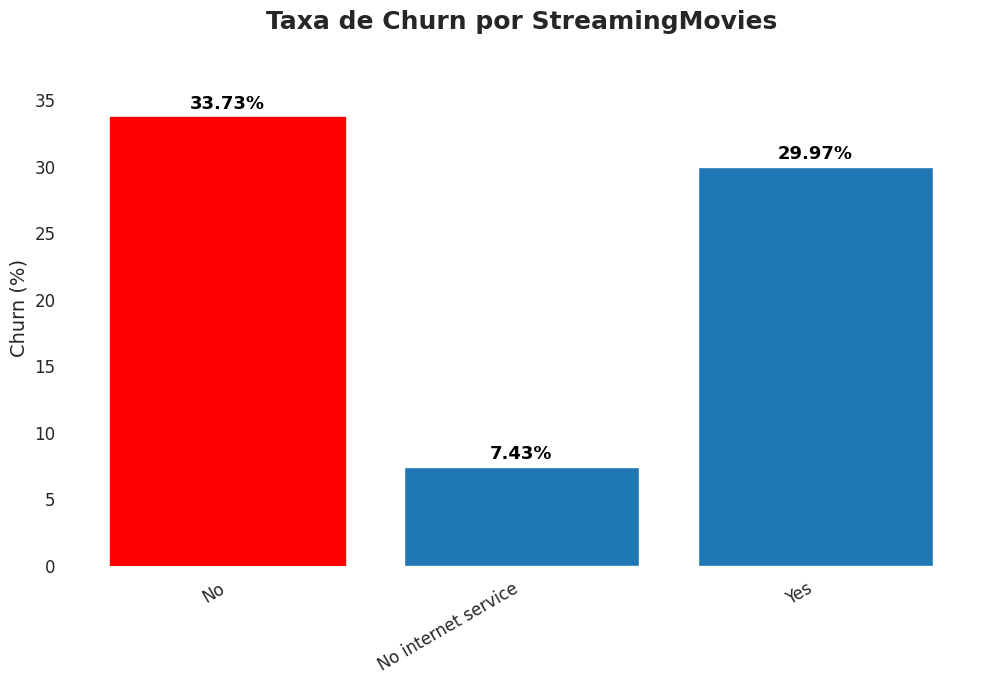


**Churn Rate para StreamingMovies:**


,StreamingMovies,Churn
0,No,33.73
1,No internet service,7.43
2,Yes,29.97


-> Maior Churn: 'No' com 33.73%


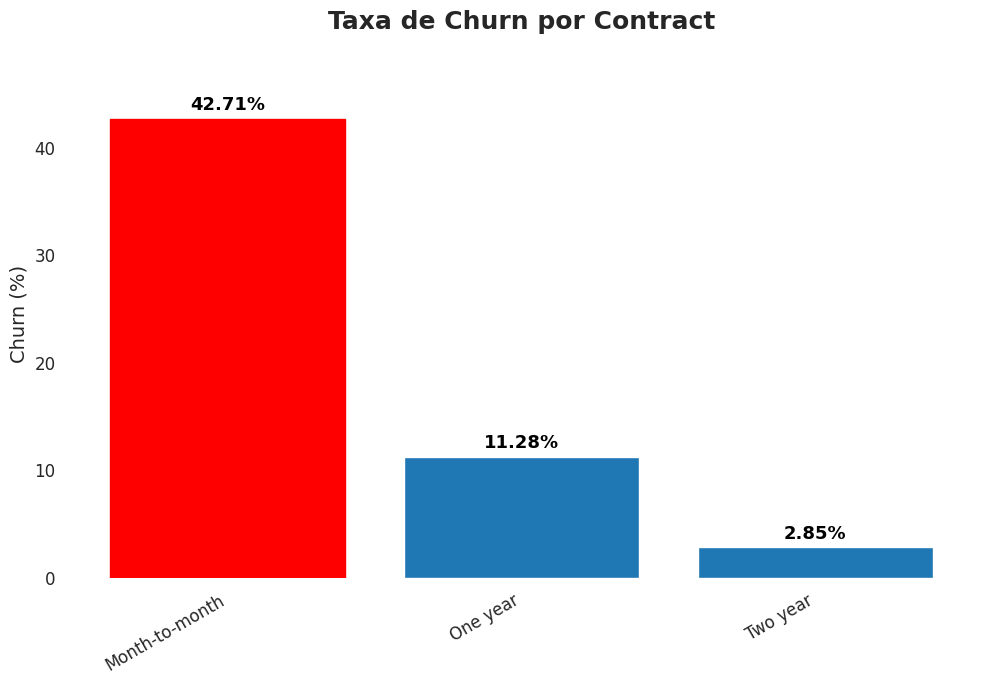


**Churn Rate para Contract:**


,Contract,Churn
0,Month-to-month,42.71
1,One year,11.28
2,Two year,2.85


-> Maior Churn: 'Month-to-month' com 42.71%


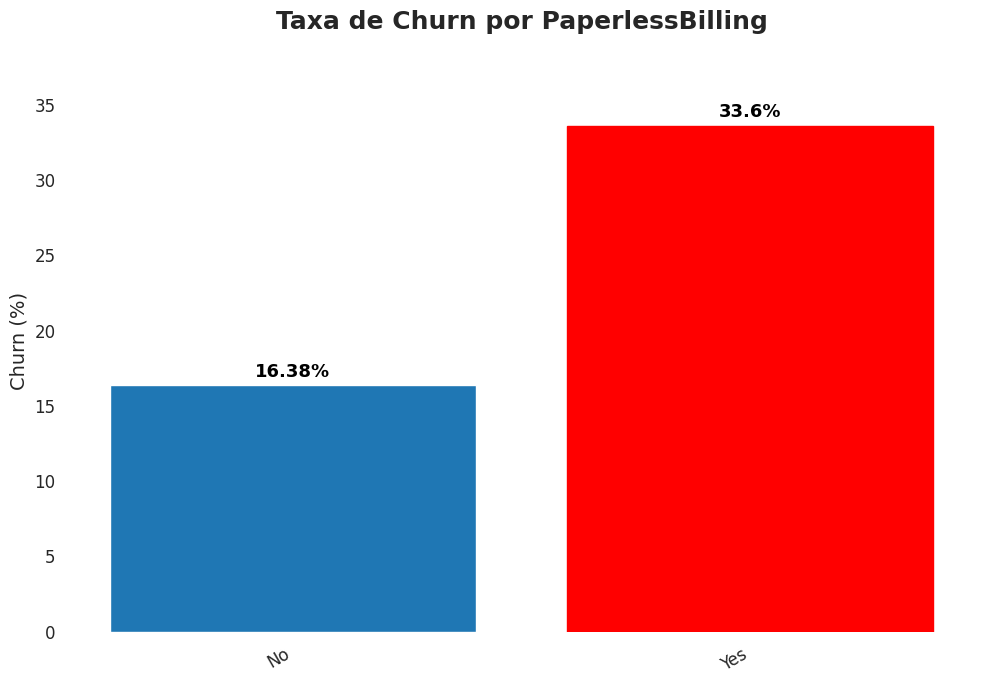


**Churn Rate para PaperlessBilling:**


,PaperlessBilling,Churn
0,No,16.38
1,Yes,33.60


-> Maior Churn: 'Yes' com 33.6%


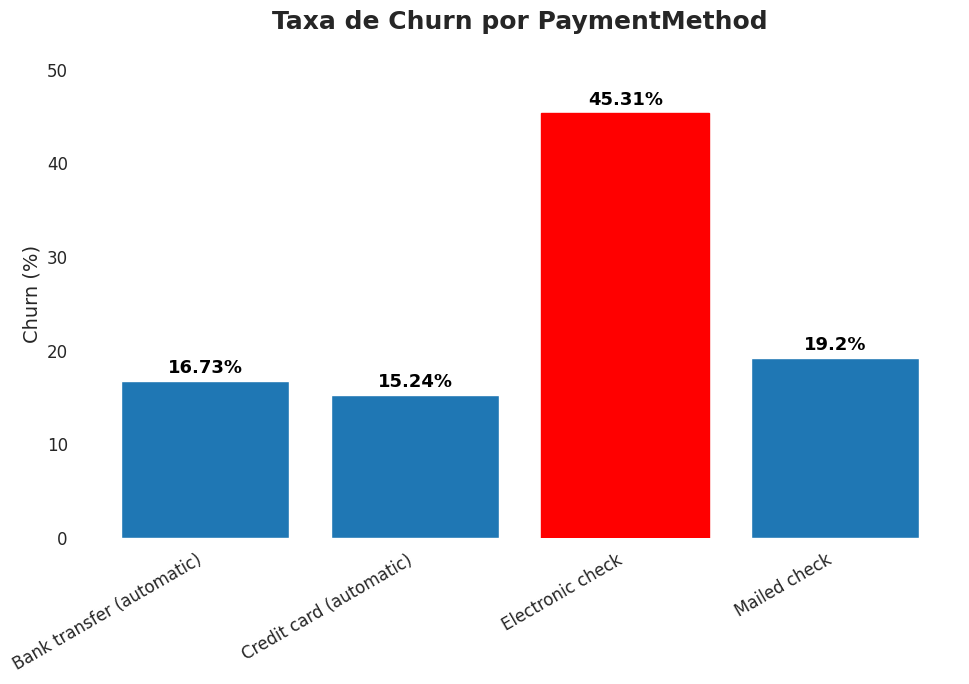


**Churn Rate para PaymentMethod:**


,PaymentMethod,Churn
0,Bank transfer (automatic),16.73
1,Credit card (automatic),15.24
2,Electronic check,45.31
3,Mailed check,19.20


-> Maior Churn: 'Electronic check' com 45.31%


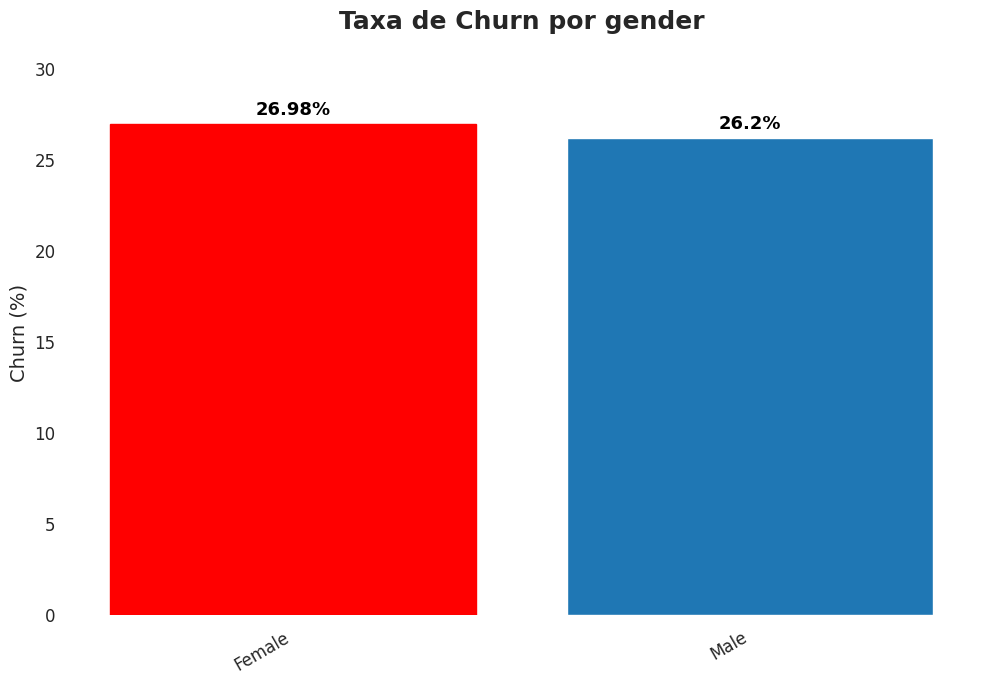


**Churn Rate para gender:**


,gender,Churn
0,Female,26.98
1,Male,26.20


-> Maior Churn: 'Female' com 26.98%


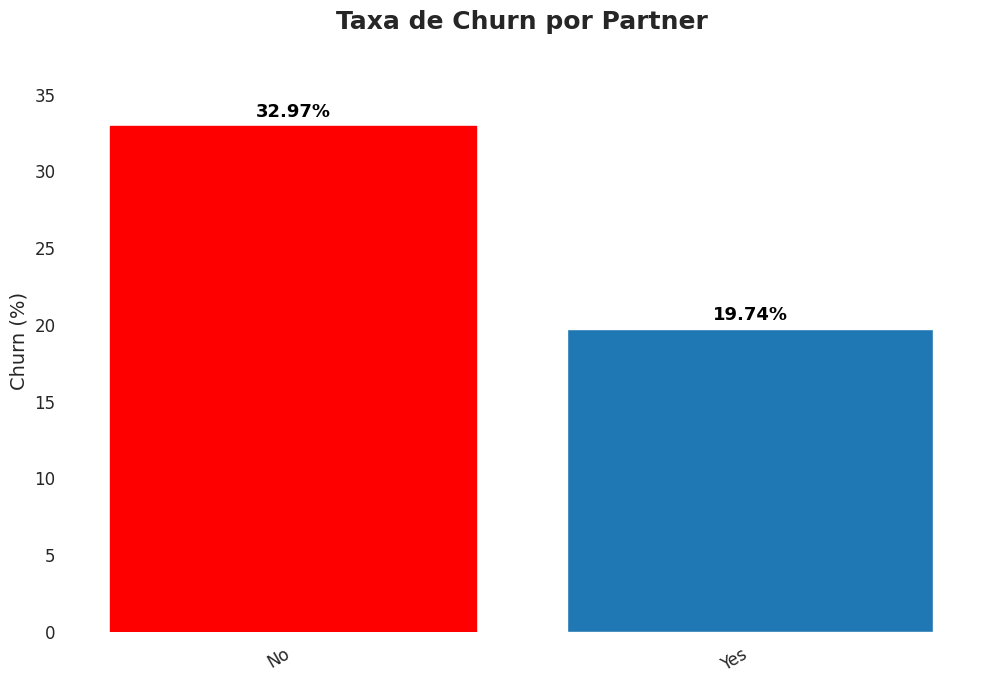


**Churn Rate para Partner:**


,Partner,Churn
0,No,32.97
1,Yes,19.74


-> Maior Churn: 'No' com 32.97%


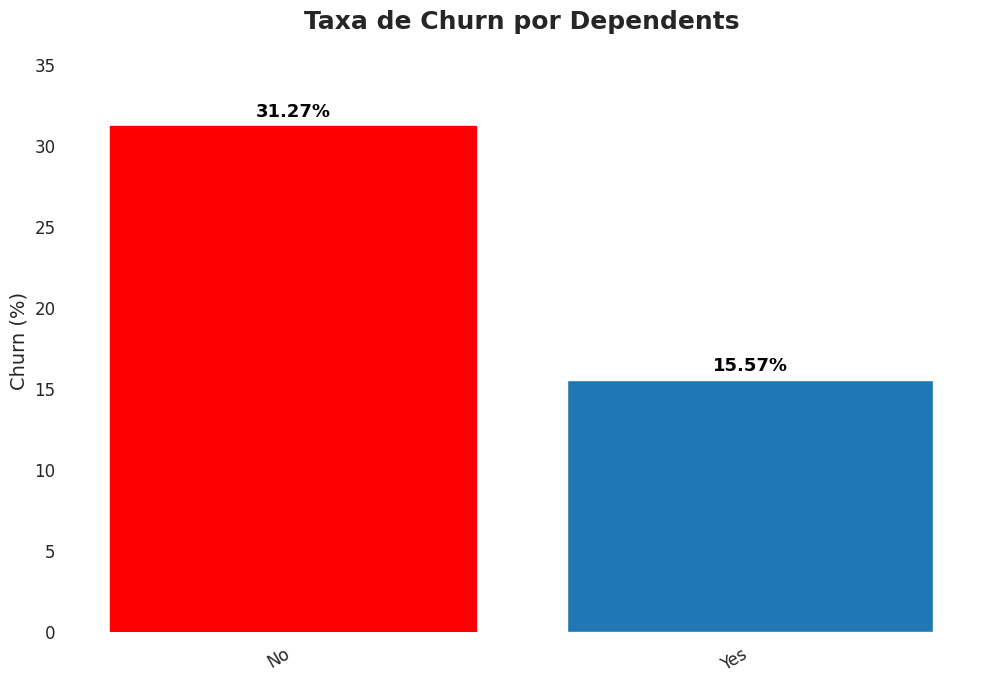


**Churn Rate para Dependents:**


,Dependents,Churn
0,No,31.27
1,Yes,15.57


-> Maior Churn: 'No' com 31.27%


In [125]:
sns.set(style="white", palette="pastel")

TITLE_SIZE = 18
LABEL_SIZE = 14
TICK_SIZE  = 12
ANNOT_SIZE = 13 

for col in cat_cols:
    churn_df = calculate_churn_rate(df_limpo, col)
    
    plt.figure(figsize=(10, 7), dpi=100)
    ax = plt.subplot()
    
    bars = ax.bar(
        x=churn_df[col].astype(str),
        height=churn_df['Churn'],
        color='#1f77b4'
    )
    
    max_idx = churn_df['Churn'].to_numpy().argmax()
    bars[max_idx].set_color('#ff0000') 
    
    ax.set_title(f'Taxa de Churn por {col}', fontsize=TITLE_SIZE, pad=15, fontweight='bold')
    ax.set_xlabel('', fontsize=LABEL_SIZE)
    ax.set_ylabel('Churn (%)', fontsize=LABEL_SIZE)
    ax.set_ylim(0, churn_df['Churn'].max() * 1.15)
    
    sns.despine(left=True, bottom=True)
    plt.xticks(fontsize=TICK_SIZE, rotation=30, ha='right')
    plt.yticks(fontsize=TICK_SIZE)
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            text=f"{height}%",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 6),
            textcoords='offset points',
            ha='center',
            fontsize=ANNOT_SIZE,
            fontweight='bold',
            color='black'
        )
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n**Churn Rate para {col}:**")
    display(churn_df)
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")

Escrever aqui depois


### Modelagem usando análise de componentes principais

Após a análise descritiva, optei por fazer uma análise de componentes principais para avaliar um perfil de clientes com **Churn(Yes)**.

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [127]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7034 entries, 0 to 7036
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   tenure                    7034 non-null   int64   
 1   PhoneService              7034 non-null   object  
 2   MultipleLines             7034 non-null   object  
 3   InternetService           7034 non-null   object  
 4   OnlineSecurity            7034 non-null   object  
 5   OnlineBackup              7034 non-null   object  
 6   DeviceProtection          7034 non-null   object  
 7   TechSupport               7034 non-null   object  
 8   StreamingTV               7034 non-null   object  
 9   StreamingMovies           7034 non-null   object  
 10  Contract                  7034 non-null   object  
 11  PaperlessBilling          7034 non-null   object  
 12  PaymentMethod             7034 non-null   object  
 13  MonthlyCharges            7034 non-null   float64 
 1

In [128]:

print(df_limpo.isnull().sum())

tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
cpf                         0
NPS                         0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
churn_bin                   0
TotalServicosContratados    0
tenure_cat                  0
dtype: int64


In [129]:
print(df_limpo.isnull().sum())


tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
cpf                         0
NPS                         0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
churn_bin                   0
TotalServicosContratados    0
tenure_cat                  0
dtype: int64


In [130]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df = df_limpo.copy()

num_cols = [c for c in [
    "tenure", "MonthlyCharges", "TotalCharges",
    "TotalServicosContratados", "SeniorCitizen", "NPS"
] if c in df.columns]

drop_cols = ["cpf", "Churn", "churn_bin"]  
use_cols = [c for c in df.columns if c not in drop_cols]


cat_cols = [c for c in use_cols
            if (df[c].dtype.name in ["object","category"]) and (c not in num_cols)]

def make_ohe():
    try:
        return OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False)

ohe = make_ohe()
scaler = StandardScaler(with_mean=True, with_std=True)

preproc = ColumnTransformer(
    transformers=[
        ("num", scaler, [c for c in num_cols if c in df.columns]),
        ("cat", ohe,  [c for c in cat_cols if c in df.columns]),
    ],
    remainder="drop"
)

In [131]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

RANDOM_STATE = 42

pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
pipe_pca = Pipeline(steps=[
    ("preprocessor", preproc),
    ("pca", pca),
])

# matriz de componentes para clusterização
X_pca = pipe_pca.fit_transform(df[use_cols])


In [132]:
# Seleciona melhor k via silhouette (2..8)
best_k, best_score = None, -1
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=RANDOM_STATE)
    labels = km.fit_predict(X_pca)
    sc = silhouette_score(X_pca, labels)
    if sc > best_score:
        best_k, best_score = k, sc

print(f"Melhor k (silhouette): {best_k} | score={best_score:.3f}")

kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_pca)

df_clusters = df.copy()
df_clusters["cluster"] = clusters


perfil_clusters = (
    df_clusters.groupby("cluster")
    .agg(
        n=("cluster", "size"),
        churn_rate=("churn_bin", "mean"),
        tenure_med=("tenure", "mean"),
        mensalidade_med=("MonthlyCharges", "mean"),
        totalcharges_med=("TotalCharges", "mean"),
        servicos_med=("TotalServicosContratados", "mean"),
        nps_med=("NPS", "mean"),
    )
    .assign(churn_rate=lambda d: (d["churn_rate"] * 100).round(2))
    .sort_values("churn_rate", ascending=False)
)

print("\n== Perfil por cluster (ordenado por churn rate) ==")
display(perfil_clusters)

def top_categorias_cluster(df_base, cat_cols, cluster_id, top=8):
    dfc = df_base[df_base["cluster"] == cluster_id]
    out = []
    total = len(df_base)
    for c in cat_cols:
        for lvl, cnt in dfc[c].value_counts(dropna=False).items():
            p_cluster = cnt / len(dfc)
            p_total = (df_base[c] == lvl).mean()
            if p_total > 0:
                lift = p_cluster / p_total
                out.append((c, str(lvl), cnt, p_cluster, p_total, lift))
    out = pd.DataFrame(out, columns=["variavel", "nivel", "freq_cluster", "p_cluster", "p_total", "lift"])
    out["lift"] = out["lift"].round(3)
    return out.sort_values("lift", ascending=False).head(top)

cluster_top = perfil_clusters.index[0]
print(f"\nTop categorias (lift) no cluster mais propenso ao churn = {cluster_top}")
display(top_categorias_cluster(df_clusters, cat_cols, cluster_top, top=12))


Melhor k (silhouette): 3 | score=0.279

== Perfil por cluster (ordenado por churn rate) ==


,n,churn_rate,tenure_med,mensalidade_med,totalcharges_med,servicos_med,nps_med
cluster,,,,,,,
1,3114,45.73,14.810854,69.017261,1031.308301,2.754335,4.996468
0,2400,13.88,56.361667,87.040979,4931.162229,5.509583,8.636250
2,1520,7.43,30.667763,21.076283,665.220329,1.223684,9.236842



Top categorias (lift) no cluster mais propenso ao churn = 1


,variavel,nivel,freq_cluster,p_cluster,p_total,lift
34,tenure_cat,1-6m,1046,0.335902,0.193489,1.736
11,DeviceProtection,No,2380,0.764290,0.440148,1.736
37,tenure_cat,7-12m,537,0.172447,0.099374,1.735
9,OnlineBackup,No,2316,0.743738,0.439011,1.694
17,StreamingMovies,No,2071,0.665061,0.395365,1.682
15,StreamingTV,No,2083,0.668915,0.399346,1.675
19,Contract,Month-to-month,2821,0.905909,0.551180,1.644
35,tenure_cat,13-24m,758,0.243417,0.148848,1.635
13,TechSupport,No,2513,0.807001,0.493745,1.634
7,OnlineSecurity,No,2485,0.798009,0.497441,1.604


## Análise do NPS

Nesta seção são analisados o NPS 

In [133]:
df_limpo['NPS'].describe()

count    7034.000000
mean        7.154677
std         2.649100
min         0.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: NPS, dtype: float64

In [134]:
# Função para Classificar o NPS
def classica_nps(score):
    if score >= 9:
        return 'Promotor'
    elif score <=  6:
        return 'Detrator'
    else:
        return 'Neutro'

In [135]:
df_limpo['Categorias_NPS'] = df_limpo['NPS'].apply(classica_nps)

counts = df_limpo['Categorias_NPS'].value_counts()

print(counts)


promotores = (counts.get('Promotor', 0) / len(df_limpo))*100
detratores = (counts.get('Detrator', 0) / len(df_limpo))*100

nps = promotores - detratores
print(round(nps,2))

Categorias_NPS
Promotor    3001
Detrator    2468
Neutro      1565
Name: count, dtype: int64
7.58


In [136]:
print("\n--- Distribuição NPS ---")
print(f"Promotores (9-10): {counts.get('Promotor', 0)} clientes ({promotores:.1f}%)")
print(f"Neutros (7-8): {counts.get('Neutro', 0)} clientes ({counts.get('Neutro', 0) / len(df_limpo) * 100:.1f}%)")
print(f"Detratores (1-6): {counts.get('Detrator', 0)} clientes ({detratores:.1f}%)")
print(f"\n>>> NPS Total: {nps:.1f} <<<")


--- Distribuição NPS ---
Promotores (9-10): 3001 clientes (42.7%)
Neutros (7-8): 1565 clientes (22.2%)
Detratores (1-6): 2468 clientes (35.1%)

>>> NPS Total: 7.6 <<<


Podemos notar que apesar de termos mais clientes do tipo **Promotores** e representam 43% , ainda há muito cliente do tipo **Detratores**o que reduiz o NPS total. Indicando um problema de insatisfação com os serviços prestados por parte da empresa. Então, faz-se necessário aprofundar nas causas destas  

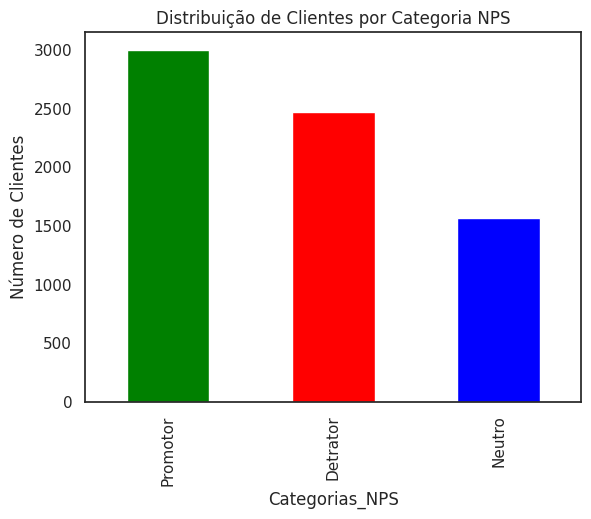

In [137]:
counts.plot(kind='bar', color=['green', 'red', 'blue']) #, color=['green', 'red', 'blue']
plt.title('Distribuição de Clientes por Categoria NPS')
plt.ylabel('Número de Clientes')
plt.show()

In [138]:
#sns.histplot(data=df_limpo, x='NPS', bins=10, kde=True)
#plt.title('Distribuição do NPS')
#plt.show()

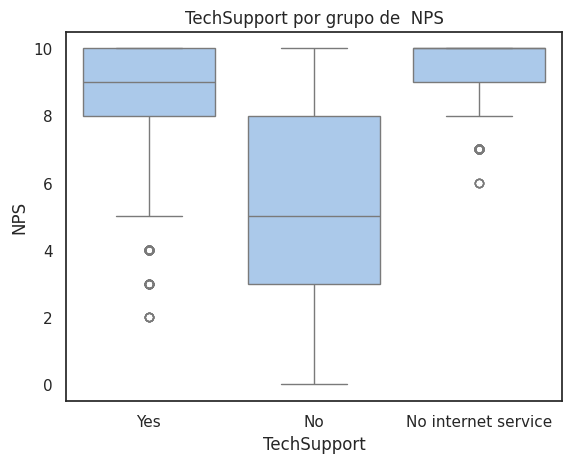

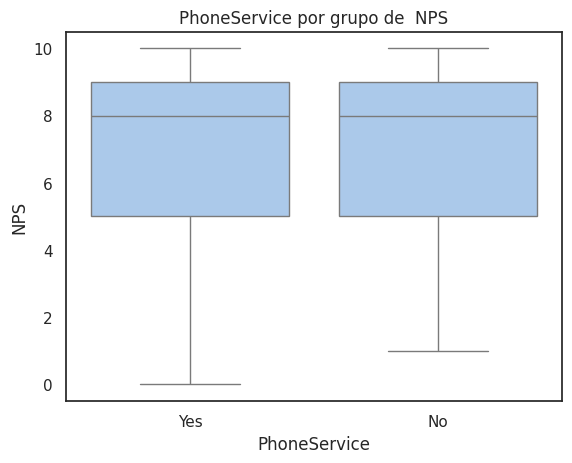

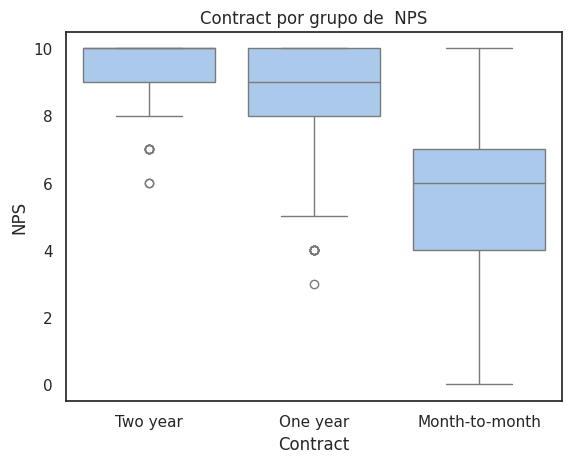

In [139]:
nome_cols = ['TechSupport','PhoneService', 'Contract' ]

for col in nome_cols:
    sns.boxplot(data=df_limpo, x=col, y='NPS')
    plt.title(f"{col} por grupo de  NPS")
    plt.show()

In [140]:
nps_score = (df_limpo[df_limpo['NPS'] >= 9].shape[0] / df_limpo.shape[0] * 100) - (df_limpo[df_limpo['NPS'] <= 6].shape[0] / df_limpo.shape[0] * 100)
print(f"NPS Agregado: {nps_score:.2f}")

NPS Agregado: 7.58


<Axes: xlabel='Churn', ylabel='TotalServicosContratados'>

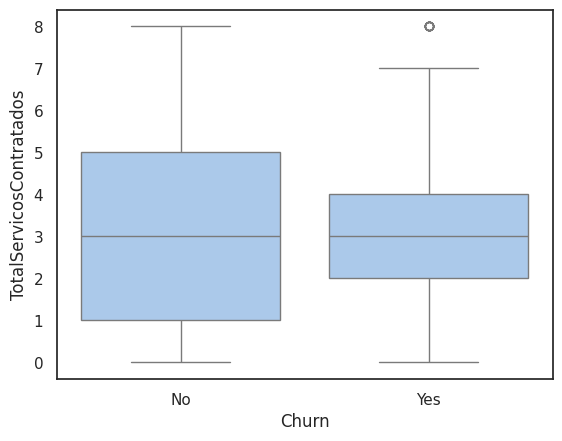

In [141]:
sns.boxplot(data=df_limpo, x='Churn', y='TotalServicosContratados')


<Axes: xlabel='TotalServicosContratados', ylabel='NPS'>

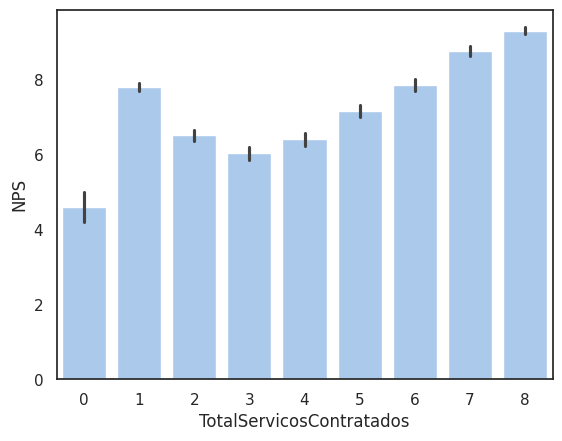

In [142]:
sns.barplot(data=df_limpo, x='TotalServicosContratados', y='NPS')


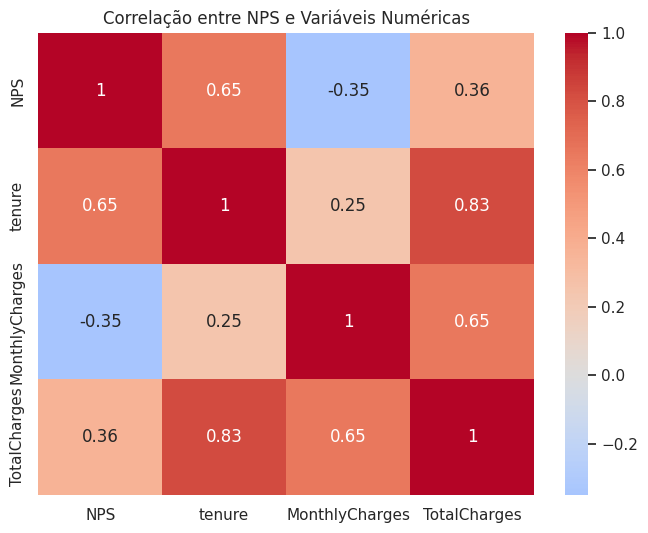

In [143]:
# Selecionar variáveis numéricas
numerical_vars = ['NPS', 'tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df_limpo[numerical_vars].corr()

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre NPS e Variáveis Numéricas')
plt.show()

A análise da matriz de correlação entre o NPS e as variáveis numéricas do conjunto de dados revela algumas relações importantes. O primeiro ponto a destacar é a correlação positiva moderada entre o NPS e o tempo de permanência (tenure), com valor de 0,64. Isso sugere que clientes com mais tempo de relacionamento tendem a apresentar maiores índices de satisfação, reforçando a importância da retenção de longo prazo para a melhoria do NPS.

Por outro lado, observa-se uma correlação negativa (-0,37) entre o NPS e os gastos mensais (MonthlyCharges). Esse resultado indica que clientes com cobranças mensais mais elevadas tendem a demonstrar menor satisfação, o que está alinhado com o alto **Churn** visto nesta região na análise anterior. Já o total gasto (TotalCharges) apresenta uma correlação positiva fraca (0,36), com o NPS, sinalizando que o acúmulo de gastos ao longo do tempo não reduz a satisfação. 

Além disso, é relevante notar a forte correlação entre algumas variáveis explicativas, como tenure e TotalCharges (0,82), reflexo natural de que o tempo de permanência impacta diretamente no valor acumulado

 Essa evidência sugere que estratégias voltadas à retenção de clientes e ao equilíbrio nos planos de cobrança podem ser determinantes para a melhoria do NPS.